In [2]:
%%capture
!pip install contextily

In [106]:
import os

import requests
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd

import arcgis
from arcgis.gis import GIS
from arcgis import geometry
from arcgis.features import GeoAccessor, GeoSeriesAccessor
import pandas as pd
from IPython.display import display

from arcgis.features import analysis
from arcgis.features import analyze_patterns
from arcgis.features import summarize_data

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

arcgis.__version__

In [126]:
def query_to_gdf_vis(data):
    gdf = gpd.GeoDataFrame.from_features(data["features"])
    gdf.crs = "EPSG:4326"
    gdf = gdf.to_crs(epsg=3857)
    ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor="k")
    ctx.add_basemap(
        ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf.crs.to_string()
    )
    plt.show()
    return gdf

def query_to_gdf_vis_col(data):
    gdf = gpd.GeoDataFrame.from_features(data["features"])
    gdf.crs = "EPSG:4326"
    gdf = gdf.to_crs(epsg=3857)
    ax = gdf.plot(
        figsize=(10, 10),
        alpha=0.6,
        edgecolor="k",
        column='cluster',       # color by cluster
        cmap='tab10',           # categorical color map
        legend=True
    )
    plt.show()
    return gdf

In [4]:
example_aoi_name = (
    "https://api.cerulean.skytruth.org/collections/public.aoi/items"  # This is the endpoint for all AOI data
    "?filter=LOWER(name) LIKE '%medit%'"  # filter by name (helps to search for what aois we can look at)
)

data = requests.get(example_aoi_name).json()
print("Number of results:", len(data["features"]))
print(data["features"][1]["properties"])

aoi_id = data["features"][0]["properties"]["id"]
aoi_id2 = data["features"][1]["properties"]["id"]

Number of results: 5
{'id': 363, 'type': 2, 'name': 'Mediterranean Sea - Western Basin'}


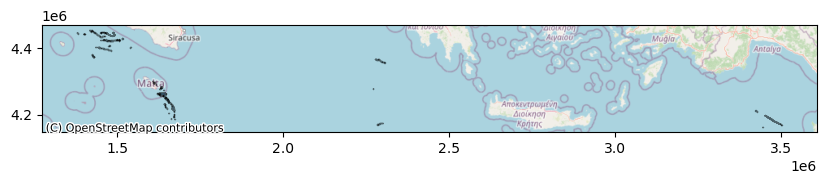

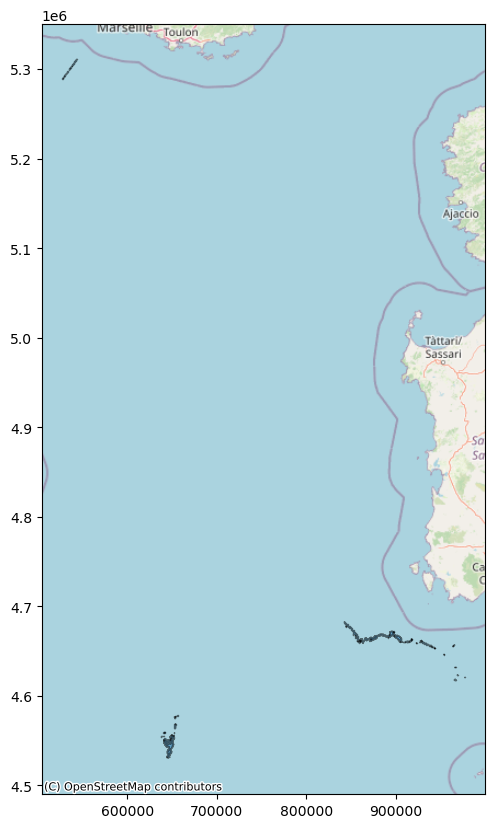

In [8]:
def get_slicks_by_aoi(aoi_id):
    '''takes an aoi_id input and queries it with our specified characteristics'''
    url = (
        "https://api.cerulean.skytruth.org/collections/public.get_slicks_by_aoi/items"
        "?limit=9999" # limiting to 100 for now while testing (default if not specific is 10, max is 9999)
        "&sortby=-machine_confidence" # sort by machine confidence (how confident it is that its an actual spill)
        "&datetime=2020-01-01T00:00:00Z/2021-01-01T00:00:00Z"  # Limit results to a specific date range (jan 01 2020 to jan 01 2021)
        "&filter=machine_confidence GTE 0.90"  # Sort by machine confidence in descending order, only return spills with detection confidence greater than or equal to .90
        f"&aoi_id={aoi_id}" # by specific area of interest id, for us it's mediterranean west basin and med east basin : f is used bc API queries read in weird sometimes, this helps it read it the way we want
    )
    data = requests.get(url).json()
    # print("Response for AOI:", aoi_id)
    # print(data)  # add these two lines to debug if needed
    return query_to_gdf_vis(data)

# query both AOIs and combine the gdfs
gdf1 = get_slicks_by_aoi(aoi_id)
gdf2 = get_slicks_by_aoi(aoi_id2)


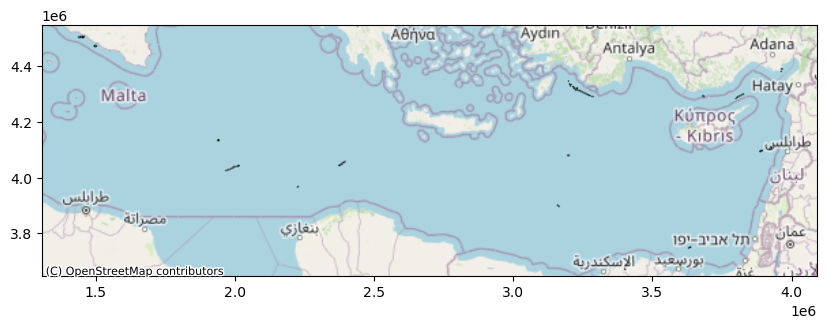

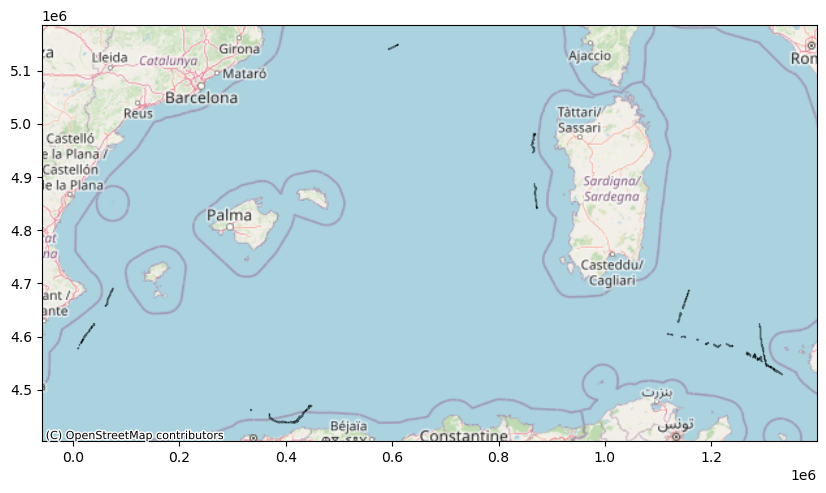

In [9]:
def get_slicks_by_aoi(aoi_id):
    '''takes an aoi_id input and queries it with our specified characteristics'''
    url = (
        "https://api.cerulean.skytruth.org/collections/public.get_slicks_by_aoi/items"
        "?limit=9999" # limiting to 100 for now while testing (default if not specific is 10, max is 9999)
        "&sortby=-machine_confidence" # sort by machine confidence (how confident it is that its an actual spill)
        "&datetime=2021-01-01T00:00:00Z/2022-01-01T00:00:00Z"  # Limit results to a specific date range (jan 01 2021 to jan 01 2022)
        "&filter=machine_confidence GTE 0.90"  # Sort by machine confidence in descending order, only return spills with detection confidence greater than or equal to .90
        f"&aoi_id={aoi_id}" # by specific area of interest id, for us it's mediterranean west basin and med east basin : f is used bc API queries read in weird sometimes, this helps it read it the way we want
    )
    data = requests.get(url).json()
    # print("Response for AOI:", aoi_id)
    # print(data)  # add these two lines to debug if needed
    return query_to_gdf_vis(data)

# query both AOIs and combine the gdfs
gdf3 = get_slicks_by_aoi(aoi_id)
gdf4 = get_slicks_by_aoi(aoi_id2)


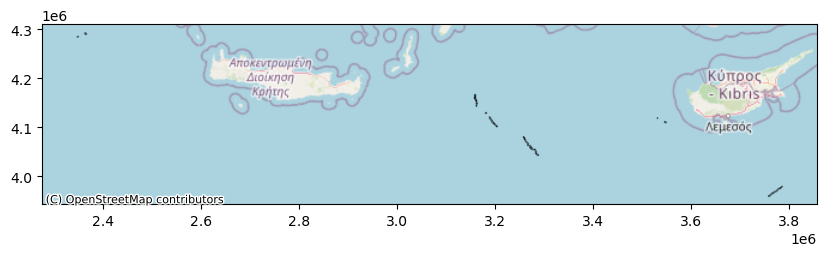

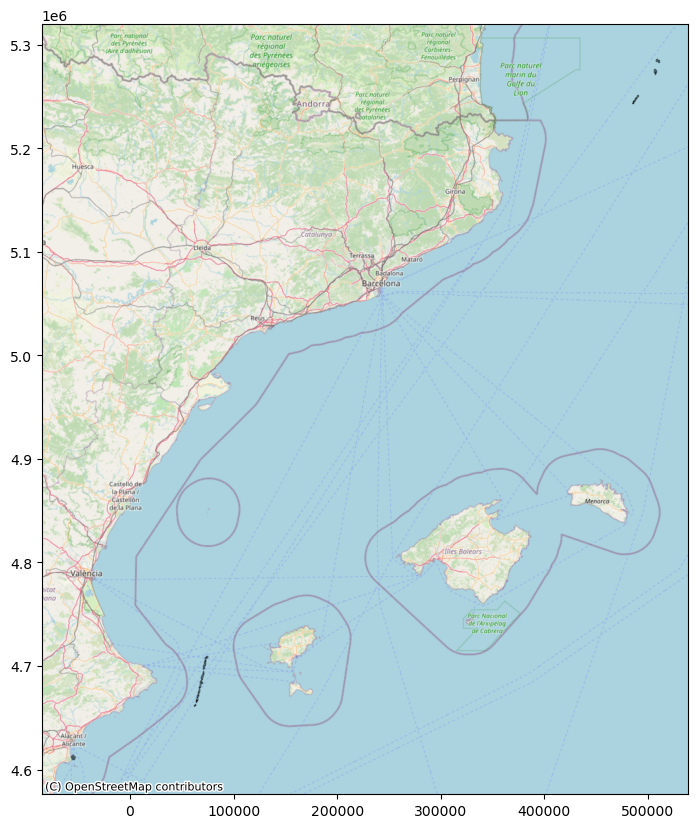

In [10]:
def get_slicks_by_aoi(aoi_id):
    '''takes an aoi_id input and queries it with our specified characteristics'''
    url = (
        "https://api.cerulean.skytruth.org/collections/public.get_slicks_by_aoi/items"
        "?limit=9999" # limiting to 100 for now while testing (default if not specific is 10, max is 9999)
        "&sortby=-machine_confidence" # sort by machine confidence (how confident it is that its an actual spill)
        "&datetime=2022-01-01T00:00:00Z/2023-01-01T00:00:00Z"  # Limit results to a specific date range (jan 01 2022 to jan 01 2023)
        "&filter=machine_confidence GTE 0.90"  # Sort by machine confidence in descending order, only return spills with detection confidence greater than or equal to .90
        f"&aoi_id={aoi_id}" # by specific area of interest id, for us it's mediterranean west basin and med east basin : f is used bc API queries read in weird sometimes, this helps it read it the way we want
    )
    data = requests.get(url).json()
    # print("Response for AOI:", aoi_id)
    # print(data)  # add these two lines to debug if needed
    return query_to_gdf_vis(data)

# query both AOIs and combine the gdfs
gdf5 = get_slicks_by_aoi(aoi_id)
gdf6 = get_slicks_by_aoi(aoi_id2)


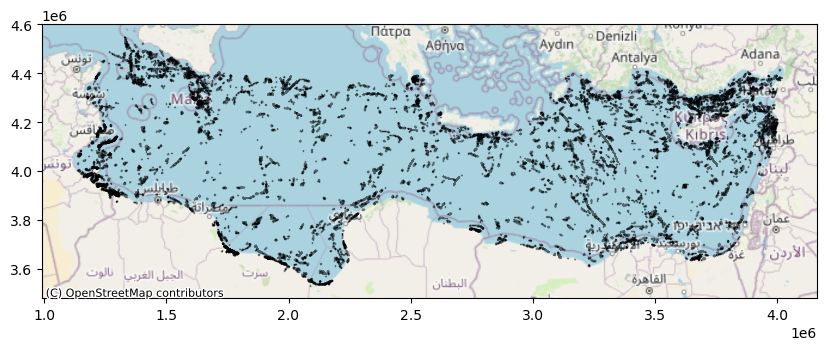

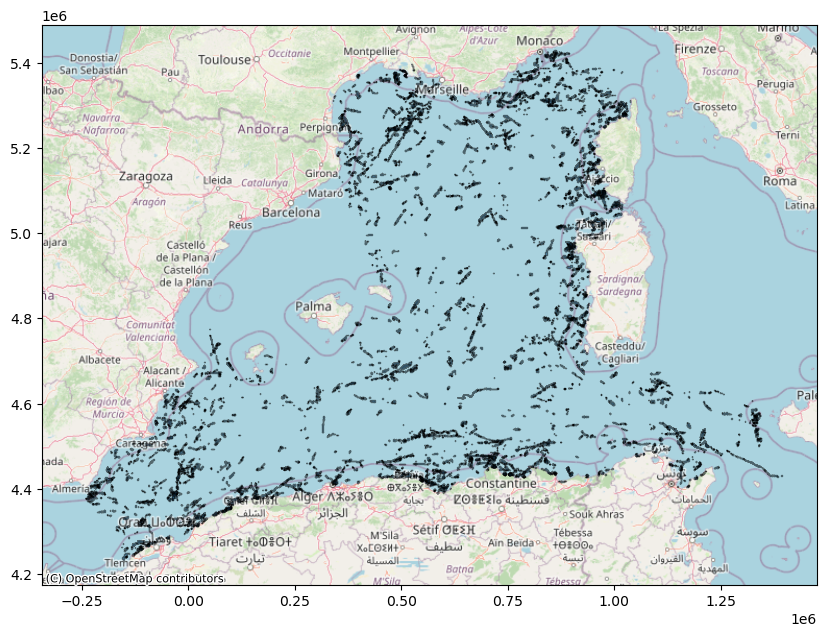

In [11]:
def get_slicks_by_aoi(aoi_id):
    '''takes an aoi_id input and queries it with our specified characteristics'''
    url = (
        "https://api.cerulean.skytruth.org/collections/public.get_slicks_by_aoi/items"
        "?limit=9999" # limiting to 100 for now while testing (default if not specific is 10, max is 9999)
        "&sortby=-machine_confidence" # sort by machine confidence (how confident it is that its an actual spill)
        "&datetime=2023-01-01T00:00:00Z/2024-01-01T00:00:00Z"  # Limit results to a specific date range (jan 01 2023 to jan 01 2024)
        "&filter=machine_confidence GTE 0.90"  # Sort by machine confidence in descending order, only return spills with detection confidence greater than or equal to .90
        f"&aoi_id={aoi_id}" # by specific area of interest id, for us it's mediterranean west basin and med east basin : f is used bc API queries read in weird sometimes, this helps it read it the way we want
    )
    data = requests.get(url).json()
    # print("Response for AOI:", aoi_id)
    # print(data)  # add these two lines to debug if needed
    return query_to_gdf_vis(data)

# query both AOIs and combine the gdfs
gdf7 = get_slicks_by_aoi(aoi_id)
gdf8 = get_slicks_by_aoi(aoi_id2)


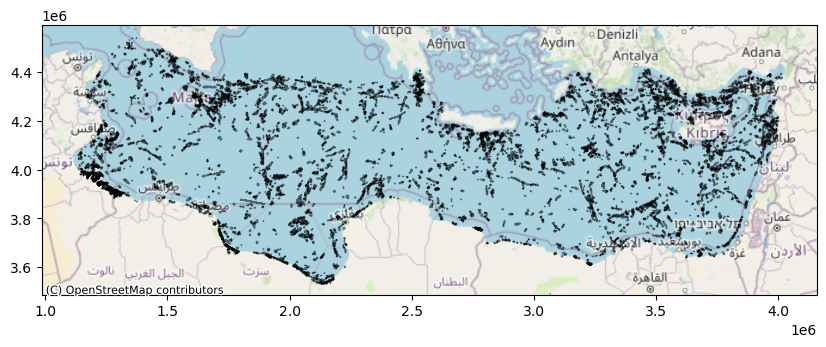

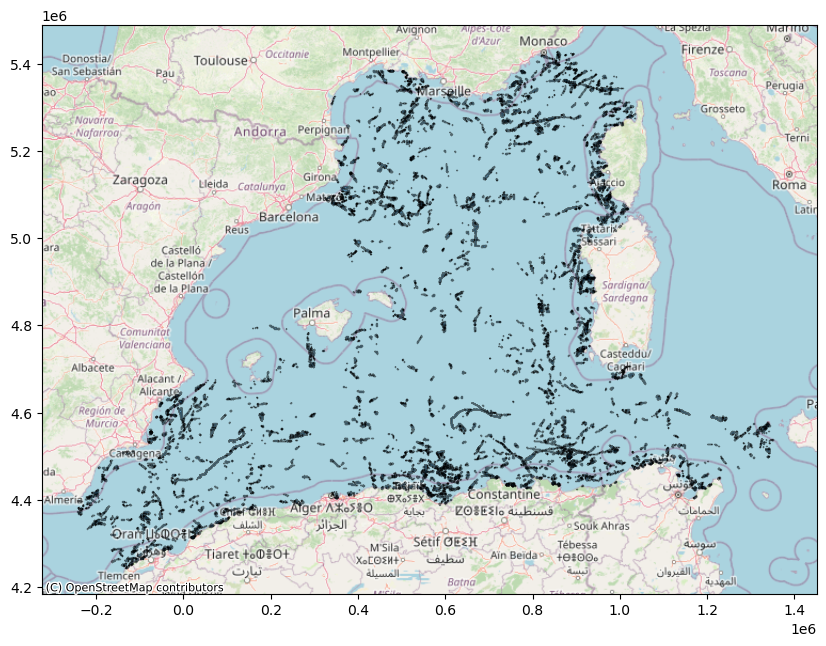

In [12]:
def get_slicks_by_aoi(aoi_id):
    '''takes an aoi_id input and queries it with our specified characteristics'''
    url = (
        "https://api.cerulean.skytruth.org/collections/public.get_slicks_by_aoi/items"
        "?limit=9999" # limiting to 100 for now while testing (default if not specific is 10, max is 9999)
        "&sortby=-machine_confidence" # sort by machine confidence (how confident it is that its an actual spill)
        "&datetime=2024-01-01T00:00:00Z/2025-01-01T00:00:00Z"  # Limit results to a specific date range (jan 01 2024 to jan 01 2025)
        "&filter=machine_confidence GTE 0.90"  # Sort by machine confidence in descending order, only return spills with detection confidence greater than or equal to .90
        f"&aoi_id={aoi_id}" # by specific area of interest id, for us it's mediterranean west basin and med east basin : f is used bc API queries read in weird sometimes, this helps it read it the way we want
    )
    data = requests.get(url).json()
    # print("Response for AOI:", aoi_id)
    # print(data)  # add these two lines to debug if needed
    return query_to_gdf_vis(data)

# query both AOIs and combine the gdfs
gdf9 = get_slicks_by_aoi(aoi_id)
gdf10 = get_slicks_by_aoi(aoi_id2)

In [14]:
gdf_combined20 = gpd.GeoDataFrame(pd.concat([gdf1, gdf2], ignore_index=True))
gdf_combined21 = gpd.GeoDataFrame(pd.concat([gdf3, gdf4], ignore_index=True))
gdf_combined22 = gpd.GeoDataFrame(pd.concat([gdf5, gdf6], ignore_index=True))
gdf_combined23 = gpd.GeoDataFrame(pd.concat([gdf7, gdf8], ignore_index=True))
gdf_combined24 = gpd.GeoDataFrame(pd.concat([gdf9, gdf10], ignore_index=True))

In [54]:
gdf_final = gpd.GeoDataFrame(pd.concat(
    [gdf_combined20, gdf_combined21, gdf_combined22, gdf_combined23, gdf_combined24],
    ignore_index=True
))
gdf_final.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
gdf_final.head()
# gdf_combined.shape

geometry       id    linearity  \
0  MULTIPOLYGON (((3500892.343 4169066.378, 35009...  3581643  5246.365454   
1  MULTIPOLYGON (((1493503.143 4438134.886, 14936...  3581752  7657.234902   
2  MULTIPOLYGON (((1520555.671 4430952.015, 15211...  3474854   173.425835   
3  MULTIPOLYGON (((2299757.821 4175786.302, 22998...  3581962  1263.164600   
4  MULTIPOLYGON (((3419480.837 4214991.727, 34195...  3581651   322.435373   

       slick_timestamp  active  orchestrator_run                 create_time  \
0  2020-11-06T15:58:08    True            179195  2024-12-03T18:52:49.611954   
1  2020-10-23T05:13:29    True            179204  2024-12-03T18:53:18.593556   
2  2020-09-23T17:04:39    True            151729  2024-09-20T12:16:56.657091   
3  2020-10-27T04:40:47    True            179207  2024-12-03T18:54:32.020087   
4  2020-11-06T15:58:08    True            179195  2024-12-03T18:52:49.611954   

   inference_idx  cls hitl_cls  ...  fill_factor  \
0              3    5     None  ...     0.244946   
1              3    5     None  ...     0.049705   
2              3    5     None  ...     0.226733   
3              3    5     None  ...     0.165850   
4              3    5     None  ...     0.416663   

                                         s1_scene_id  cls_short_name  \
0  S1A_IW_GRDH_1SDV_20201106T155808_20201106T1558...          VESSEL   
1  S1A_IW_GRDH_1SDV_20201023T051329_20201023T0513...          VESSEL   
2  S1A_IW_GRDH_1SDV_20200923T170439_20200923T1705...          VESSEL   
3  S1A_IW_GRDH_1SDV_20201027T044047_20201027T0441...          VESSEL   
4  S1A_IW_GRDH_1SDV_20201106T155808_20201106T1558...          VESSEL   

   cls_long_name  aoi_type_1_ids  aoi_type_2_ids aoi_type_3_ids  \
0         Vessel           [159]           [326]           None   
1         Vessel           [224]           [326]           None   
2         Vessel           [224]           [326]           None   
3         Vessel           [175]           [326]           None   
4         Vessel           [176]           [326]           None   

                                   source_type_1_ids source_type_2_ids  \
0                             [667001716, 368065790]              None   
1  [355770000, 215330000, 371831000, 374824000, 2...              None   
2                                               None              None   
3       [511234000, 564361000, 215334000, 636018485]              None   
4                                        [667001716]              None   

                                   source_type_3_ids  
0  [D78.61121, D132.58676, D93.95600999999999, D1...  
1                           [D62.785477, D199.73715]  
2                                               None  
3                                               None  
4  [D147.52322, D93.95600999999999, D132.58676, D...  

[5 rows x 25 columns]

In [91]:
gdf_projected = gdf_final.to_crs(epsg=32633)
gdf_centroids = gdf_projected.copy()
gdf_centroids['geometry'] = gdf_projected['geometry'].centroid

In [92]:
#gdf_centroids = gdf_centroids.to_crs(gdf_final.crs)

# Step 3: Extract centroid coordinates into new columns
gdf_centroids['longitude'] = gdf_centroids.geometry.x
gdf_centroids['latitude'] = gdf_centroids.geometry.y

# Step 4: Drop the geometry column if you only want CSV with coordinates
teamoilspillcentroids_csv = gdf_centroids.drop(columns='geometry')

# Step 5: Save to CSV
teamoilspillcentroids_csv.to_csv('teamoilspillcentroids.csv', index=False)

In [49]:
#gdf_final['geometry'] = gdf_final['geometry'].apply(lambda geom: geom.wkt)

# Save to CSV
gdf_final.to_csv("teamoilspill.csv", index=False)

__now for my next trick i will attempt clustering__

In [93]:
#extract coordinates
coords = gdf_centroids[['longitude', 'latitude']].values


In [94]:
# standardize coordinates
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)


In [95]:
scaler = StandardScaler()
coords_scaled = scaler.fit_transform(coords)

In [96]:
# apply dbscan
db = DBSCAN(eps=0.06, min_samples=15)  # this looks the best but according to 
labels = db.fit_predict(coords_scaled)

In [97]:
# add cluster labels back to GeoDataFrame
gdf_centroids['cluster'] = labels

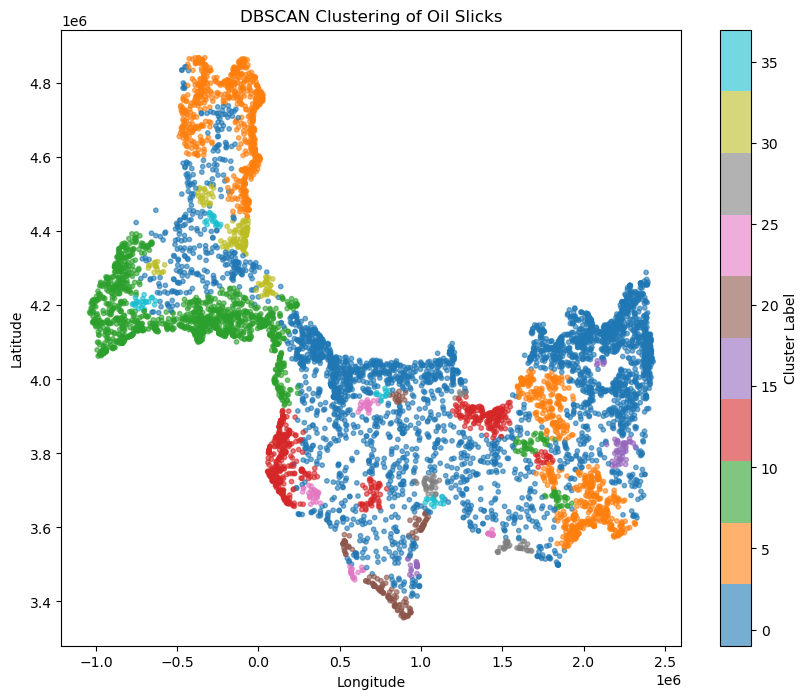

In [98]:
# plot the clusters
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(
    gdf_centroids['longitude'],
    gdf_centroids['latitude'],
    c=gdf_centroids['cluster'],
    cmap='tab10',
    s=10,
    alpha=0.6
)
plt.title('DBSCAN Clustering of Oil Slicks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(scatter, label='Cluster Label')
plt.show()

In [119]:
# Log in to ArcGIS (use anonymous or your credentials)
gis = GIS(username = 'gpec447sp25_19')

Enter password:  ········


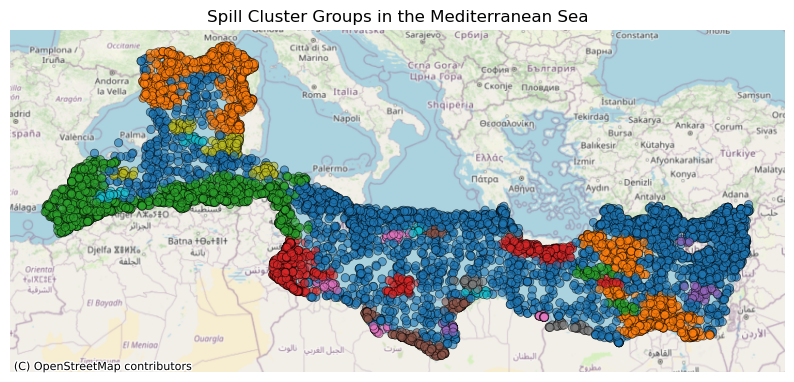

In [139]:
ax = gdf_centroids.plot(
        column='cluster',       # Color by this column
        cmap='tab10',           # Use a categorical color map
        figsize=(10, 10),
        edgecolor='black',
        linewidth=0.5,
        alpha=0.6
    )
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf_centroids.crs)
ax.set_title("Spill Cluster Groups in the Mediterranean Sea")
ax.set_axis_off()
plt.show()

In [99]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# 10 nearest neighbors 
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(coords_scaled)
distances, _ = neighbors_fit.kneighbors(coords_scaled)

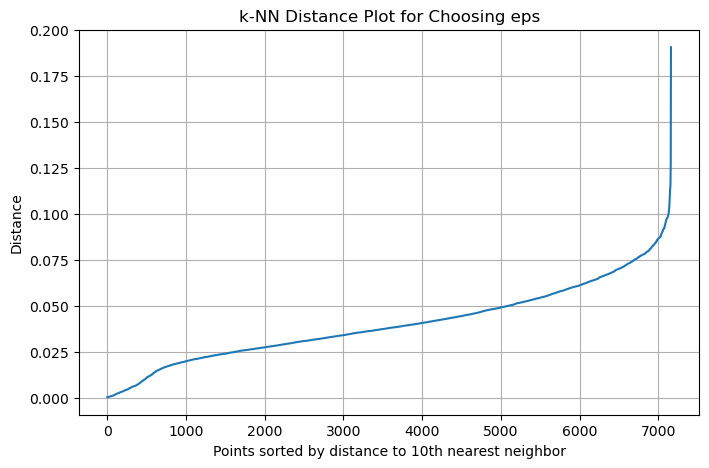

In [100]:
# Sort distances to visualize the elbow
distances = np.sort(distances[:, -1])  # Use the 10th nearest neighbor distance
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('k-NN Distance Plot for Choosing eps')
plt.xlabel('Points sorted by distance to 10th nearest neighbor')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [101]:
for eps in [0.3, 0.4, 0.5, 0.6]:
    for min_samples in [5, 10, 15]:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(coords_scaled)
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(f"eps: {eps}, min_samples: {min_samples}, clusters: {num_clusters}, noise points: {list(labels).count(-1)}")


eps: 0.3, min_samples: 5, clusters: 1, noise points: 0
eps: 0.3, min_samples: 10, clusters: 1, noise points: 0
eps: 0.3, min_samples: 15, clusters: 1, noise points: 0
eps: 0.4, min_samples: 5, clusters: 1, noise points: 0
eps: 0.4, min_samples: 10, clusters: 1, noise points: 0
eps: 0.4, min_samples: 15, clusters: 1, noise points: 0
eps: 0.5, min_samples: 5, clusters: 1, noise points: 0
eps: 0.5, min_samples: 10, clusters: 1, noise points: 0
eps: 0.5, min_samples: 15, clusters: 1, noise points: 0
eps: 0.6, min_samples: 5, clusters: 1, noise points: 0
eps: 0.6, min_samples: 10, clusters: 1, noise points: 0
eps: 0.6, min_samples: 15, clusters: 1, noise points: 0


__hawt spawt__

In [102]:
gis = GIS(username = 'gpec447sp25_19')

Enter password:  ········


In [103]:
gdf_centroids.head()

geometry       id    linearity      slick_timestamp  \
0  POINT (1981351.242 4012078.005)  3581643  5246.365454  2020-11-06T15:58:08   
1   POINT (350316.547 4098177.613)  3581752  7657.234902  2020-10-23T05:13:29   
2   POINT (376281.295 4087853.118)  3474854   173.425835  2020-09-23T17:04:39   
3  POINT (1009354.977 3895220.506)  3581962  1263.164600  2020-10-27T04:40:47   
4  POINT (1937536.196 4027870.939)  3581651   322.435373  2020-11-06T15:58:08   

   active  orchestrator_run                 create_time  inference_idx  cls  \
0    True            179195  2024-12-03T18:52:49.611954              3    5   
1    True            179204  2024-12-03T18:53:18.593556              3    5   
2    True            151729  2024-09-20T12:16:56.657091              3    5   
3    True            179207  2024-12-03T18:54:32.020087              3    5   
4    True            179195  2024-12-03T18:52:49.611954              3    5   

  hitl_cls  ...  cls_long_name  aoi_type_1_ids  aoi_type_2_ids  \
0     None  ...         Vessel           [159]           [326]   
1     None  ...         Vessel           [224]           [326]   
2     None  ...         Vessel           [224]           [326]   
3     None  ...         Vessel           [175]           [326]   
4     None  ...         Vessel           [176]           [326]   

   aoi_type_3_ids                                  source_type_1_ids  \
0            None                             [667001716, 368065790]   
1            None  [355770000, 215330000, 371831000, 374824000, 2...   
2            None                                               None   
3            None       [511234000, 564361000, 215334000, 636018485]   
4            None                                        [667001716]   

   source_type_2_ids                                  source_type_3_ids  \
0               None  [D78.61121, D132.58676, D93.95600999999999, D1...   
1               None                           [D62.785477, D199.73715]   
2               None                                               None   
3               None                                               None   
4               None  [D147.52322, D93.95600999999999, D132.58676, D...   

      longitude      latitude cluster  
0  1.981351e+06  4.012078e+06       0  
1  3.503165e+05  4.098178e+06       1  
2  3.762813e+05  4.087853e+06       1  
3  1.009355e+06  3.895221e+06      -1  
4  1.937536e+06  4.027871e+06       0  

[5 rows x 28 columns]

In [104]:
#Truncating column names to less than 10, and if they are duplicates than add 1,2,3...etc.
def truncate_column_names_safe(gdf, max_length=10):
    existing = set()
    new_columns = {}

    for col in gdf.columns:
        if len(col) <= max_length:
            new_col = col
        else:
            base = col[:max_length]
            new_col = base
            i = 1
            while new_col in existing or new_col in new_columns.values():
                suffix = f"_{i}"
                new_col = (base[:max_length - len(suffix)] + suffix)
                i += 1
        new_columns[col] = new_col
        existing.add(new_col)

    return gdf.rename(columns=new_columns)

# Use it
gdf_short = truncate_column_names_safe(gdf_centroids)



In [111]:
gdf_short.head()

geometry       id    linearity           slick_time  \
0  POINT (1981351.242 4012078.005)  3581643  5246.365454  2020-11-06T15:58:08   
1   POINT (350316.547 4098177.613)  3581752  7657.234902  2020-10-23T05:13:29   
2   POINT (376281.295 4087853.118)  3474854   173.425835  2020-09-23T17:04:39   
3  POINT (1009354.977 3895220.506)  3581962  1263.164600  2020-10-27T04:40:47   
4  POINT (1937536.196 4027870.939)  3581651   322.435373  2020-11-06T15:58:08   

   active  orchestrat                  create_tim  inference_  cls hitl_cls  \
0    True      179195  2024-12-03T18:52:49.611954           3    5     None   
1    True      179204  2024-12-03T18:53:18.593556           3    5     None   
2    True      151729  2024-09-20T12:16:56.657091           3    5     None   
3    True      179207  2024-12-03T18:54:32.020087           3    5     None   
4    True      179195  2024-12-03T18:52:49.611954           3    5     None   

   ...  cls_long_n  aoi_type_1  aoi_type_2  aoi_type_3  \
0  ...      Vessel       [159]       [326]        None   
1  ...      Vessel       [224]       [326]        None   
2  ...      Vessel       [224]       [326]        None   
3  ...      Vessel       [175]       [326]        None   
4  ...      Vessel       [176]       [326]        None   

                                          source_typ  source_t_1  \
0                             [667001716, 368065790]        None   
1  [355770000, 215330000, 371831000, 374824000, 2...        None   
2                                               None        None   
3       [511234000, 564361000, 215334000, 636018485]        None   
4                                        [667001716]        None   

                                          source_t_2     longitude  \
0  [D78.61121, D132.58676, D93.95600999999999, D1...  1.981351e+06   
1                           [D62.785477, D199.73715]  3.503165e+05   
2                                               None  3.762813e+05   
3                                               None  1.009355e+06   
4  [D147.52322, D93.95600999999999, D132.58676, D...  1.937536e+06   

       latitude cluster  
0  4.012078e+06       0  
1  4.098178e+06       1  
2  4.087853e+06       1  
3  3.895221e+06      -1  
4  4.027871e+06       0  

[5 rows x 28 columns]

In [107]:
sdf = GeoAccessor.from_geodataframe(gdf_short)
gdf_short.to_file("oil_spill_points.shp") 

# this produces a few errors on unprocessable lat/long coords - these are ignored

/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 136669155.223935008 of field area of feature 5 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 109877370.723330975 of field area of feature 253 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 109574509.26808393 of field area of feature 355 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning: Value 100045461.808231175 of field area of feature 487 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
/opt/conda/lib/python3.11/site-packages/pyogrio/raw.py:723: RuntimeWarning:

In [109]:
# This cell uploads our hot spot to ArcGIS - don't run again bc the output_name will already exist and give you an error
#spills_fl = gis.content.get('48b841b969da4129be70d0cd9998fdee')


#spill_hot_spots = arcgis.features.analysis.find_hot_spots(spills_fl,
#                                     output_name='oil_spills_hotspots',
#                                     shape_type='hexagon', gis=gis)

#spills_fl = gis.content.get('48b841b969da4129be70d0cd9998fdee')


#spill_hot_spots = arcgis.features.analysis.find_hot_spots(spills_fl,
#                                     output_name='oil_spills_hotspots_rp',
#                                     shape_type='hexagon', gis=gis)

# The error produced on CRS is ignored - the projected CRS is correct and the same

{"messageCode": "AO_984", "message": "The spatial reference for the input layer does not appear to match the defined output coordinate system."}
WARNING 001605: Distances for Geographic Coordinates (degrees, minutes, seconds) are analyzed using Chordal Distances in meters.
{"cost": 7.161}


In [89]:
spill_hot_spots

<Item title:"oil_spills_hotspots" type:Feature Layer Collection owner:gpec447sp25_19>

In [110]:
m4 = gis.map('Mediterranean Sea')
m4.content.add(spill_hot_spots)
m4.legend.enabled = True
m4

Map(center=[3980817.4992621825, 3312906.630679896], extent={'xmin': 2404984.863769957, 'ymin': 2935544.4185499…